# Adjency Matrix

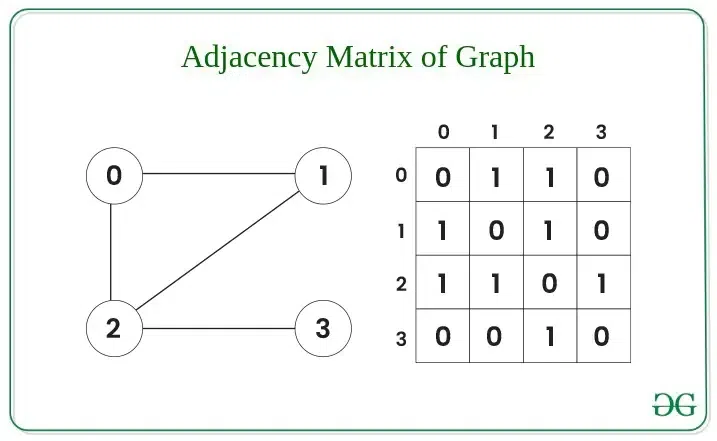

[src](https://www.geeksforgeeks.org/python/introduction-to-graphs-in-python/)

In [3]:
def add_edge(matrix, i, j):
    matrix[i][j] = 1
    matrix[j][i] = 1

def display_matrix(matrix):
    for row in matrix:
        print(' '.join(map(str, row)))



In [4]:
# Number of vertices
V = 4

matrix = [[0] * V for _ in range(V)]

for i, j in ((0, 1), (0, 2), (1, 2), (2, 3)):
    add_edge(matrix, i, j)

display_matrix(matrix)

0 1 1 0
1 0 1 0
1 1 0 1
0 0 1 0


# Adency List

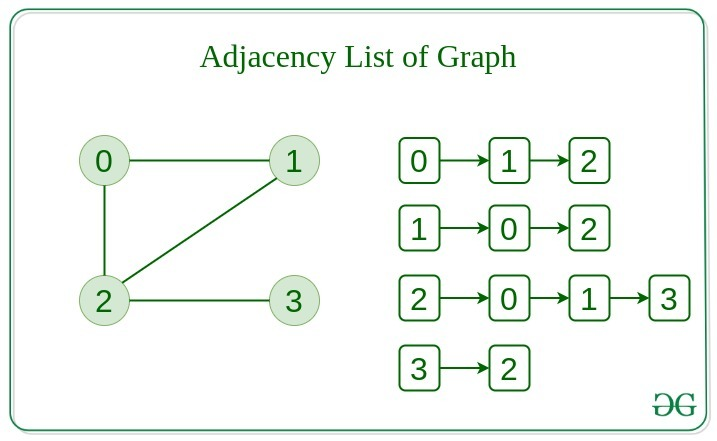

In [5]:
def add_edge(matrix, i, j):
    matrix[i].append(j)
    matrix[j].append(i)

def display_adj_list(matrix):
    for i in range(len(matrix)):
        print(f'{i}: ', end='')
        for j in matrix[i]:
            print(j, end= ' ')
        print()

In [6]:
matrix = [[] * V for _ in range(V)]

for i, j in ((0, 1), (0, 2), (1, 2), (2, 3)):
    add_edge(matrix, i, j)

display_adj_list(matrix)

0: 1 2 
1: 0 2 
2: 0 1 3 
3: 2 


# Graph


In [1]:
graph = {
    'a' : {'c'},
    'b' : {'c', 'e'},
    'c' : {'a', 'b', 'd', 'e'},
    'd' : {'c'},
    'e' : {'c', 'b'},
    'f' : {}
}

def generate_edges(graph):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append({node, neighbour})

    return edges

print(generate_edges(graph))

[{'c', 'a'}, {'c', 'b'}, {'b', 'e'}, {'c', 'a'}, {'c', 'b'}, {'c', 'd'}, {'c', 'e'}, {'c', 'd'}, {'c', 'e'}, {'b', 'e'}]


In [2]:
class Graph(object):

    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self._graph_dict = graph_dict

    def edges(self, vertice):
        """ returns a list of all the edges of a vertice"""
        return self._graph_dict[vertice]
        
    def all_vertices(self):
        """ returns the vertices of a graph as a set """
        return set(self._graph_dict.keys())

    def all_edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self._graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self._graph_dict:
            self._graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        vertex1, vertex2 = tuple(edge)
        for x, y in [(vertex1, vertex2), (vertex2, vertex1)]:
            if x in self._graph_dict:
                self._graph_dict[x].add(y)
            else:
                self._graph_dict[x] = [y]

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self._graph_dict:
            for neighbour in self._graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges
    
    def __iter__(self):
        self._iter_obj = iter(self._graph_dict)
        return self._iter_obj
    
    def __next__(self):
        """ allows us to iterate over the vertices """
        return next(self._iter_obj)

    def __str__(self):
        res = "vertices: "
        for k in self._graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

In [4]:
graph = Graph(graph)

for vertice in graph:
    print(f"Edges of vertice {vertice}: ", graph.edges(vertice))

Edges of vertice a:  {'c'}
Edges of vertice b:  {'c', 'e'}
Edges of vertice c:  {'a', 'b', 'd', 'e'}
Edges of vertice d:  {'c'}
Edges of vertice e:  {'c', 'b'}
Edges of vertice f:  {}


In [5]:
graph.add_edge({"ab", "fg"})
graph.add_edge({"xyz", "bla"})

In [6]:
print("Vertices of graph:")
print(graph.all_vertices())

print("Edges of graph:")
print(graph.all_edges())

Vertices of graph:
{'c', 'e', 'bla', 'ab', 'a', 'd', 'fg', 'b', 'xyz', 'f'}
Edges of graph:
[{'c', 'a'}, {'c', 'b'}, {'b', 'e'}, {'c', 'd'}, {'c', 'e'}, {'ab', 'fg'}, {'xyz', 'bla'}]
